In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading data

In [3]:
travel = pd.read_csv('data_travel.csv',skipinitialspace=True)
travel.head()

,interested_travel,computer_owner,age,home_value,loan_ratio,risk_score,marital,interested_sport,HH_grandparent,HH_dieting,HH_head_age,auto_member,interested_golf,interested_gambling,HH_has_children,HH_adults_num,interested_reading
0,NaN,NaN,64,124035,73,932,3,312,420,149,96,626,0,0,NaN,NaN,0
1,0.0,1.0,69,138574,73,1000,7,241,711,263,68,658,0,0,N,5.0,3
2,0.0,0.0,57,148136,77,688,1,367,240,240,56,354,0,1,N,2.0,1
3,1.0,1.0,80,162532,74,932,7,291,832,197,86,462,1,1,Y,2.0,3
4,1.0,1.0,48,133580,77,987,10,137,121,209,42,423,0,1,Y,3.0,3


In [4]:
travel.shape

(167177, 17)

In [5]:
travel.describe(include='all')

,interested_travel,computer_owner,age,home_value,loan_ratio,risk_score,marital,interested_sport,HH_grandparent,HH_dieting,HH_head_age,auto_member,interested_golf,interested_gambling,HH_has_children,HH_adults_num,interested_reading
count,149788.000000,149788.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,167177.000000,159899,145906.000000,167177
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,3
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111462,NaN,65096
mean,0.427745,0.856571,59.507079,207621.314798,66.762707,817.031751,6.884015,259.431776,377.072498,204.593341,59.368023,486.861273,0.373012,0.357842,NaN,2.770832,NaN
std,0.494753,0.350511,14.311733,107822.501900,9.751835,165.490295,2.610552,78.867456,248.045395,78.971038,16.712912,151.167457,0.483607,0.479367,NaN,1.285417,NaN
min,0.000000,0.000000,18.000000,48910.000000,0.000000,1.000000,1.000000,60.000000,0.000000,47.000000,18.000000,49.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,0.000000,1.000000,49.000000,135595.000000,63.000000,748.000000,5.000000,204.000000,182.000000,144.000000,48.000000,377.000000,0.000000,0.000000,NaN,2.000000,NaN
50%,0.000000,1.000000,59.000000,182106.000000,69.000000,844.000000,7.000000,251.000000,351.000000,185.000000,60.000000,492.000000,0.000000,0.000000,NaN,2.000000,NaN
75%,1.000000,1.000000,70.000000,248277.000000,73.000000,945.000000,9.000000,306.000000,528.000000,252.000000,71.000000,600.000000,1.000000,1.000000,NaN,4.000000,NaN


## Data Pre-processing

In [6]:
# list columns containing NA values
# sum(df[''].isnull())
travel.apply(lambda X: sum(X.isnull()), axis=0)

interested_travel      17389
computer_owner         17389
age                        0
home_value                 0
loan_ratio                 0
risk_score                 0
marital                    0
interested_sport           0
HH_grandparent             0
HH_dieting                 0
HH_head_age                0
auto_member                0
interested_golf            0
interested_gambling        0
HH_has_children         7278
HH_adults_num          21271
interested_reading         0
dtype: int64

**1. Deal with missing values.**    
First, calculate the percentage of missing values for every column, and plot them as a bar chart.

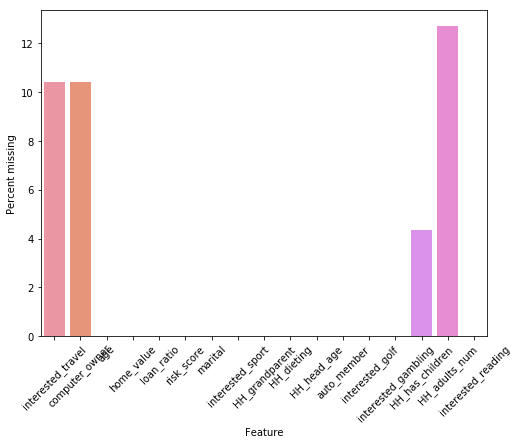

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

null_vals = travel.isnull().sum()/len(travel)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

For the Categorical variables('interested_travel', 'computer_owner', 'HH_adults_num'), since the proportion of missing data for each column is not that high, we choose to fill the missing values with it mode.


In [9]:
fill_cols = ['interested_travel', 'computer_owner', 'HH_adults_num']
fill_values = {col: travel[col].mode()[0] for col in fill_cols}

travel = travel.fillna(fill_values)

**2. Fixing error values**
* 'HH_has_children' is a bianry variable, its NaN means no child. We should fill NaN in this column with 0.

In [10]:
travel['HH_has_children'] = travel['HH_has_children']\
    .replace({'N':0, 'Y':1, np.NaN:0})

* In the 'interested_reading' column, some error values is ".", we replace then with '0', which means this clients are not interested in reading.

In [11]:
travel['interested_reading'].value_counts(dropna=False)

3    65096
1    43832
0    32919
2    24488
.      842
Name: interested_reading, dtype: int64

In [12]:
travel['interested_reading'] = travel['interested_reading']\
    .replace({'.':'0'}).astype('int')

Check NA values again

In [13]:
travel.apply(lambda X: sum(X.isnull()), axis=0)

interested_travel      0
computer_owner         0
age                    0
home_value             0
loan_ratio             0
risk_score             0
marital                0
interested_sport       0
HH_grandparent         0
HH_dieting             0
HH_head_age            0
auto_member            0
interested_golf        0
interested_gambling    0
HH_has_children        0
HH_adults_num          0
interested_reading     0
dtype: int64

In [14]:
#Check types of each column with the dataframe info () method
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167177 entries, 0 to 167176
Data columns (total 17 columns):
interested_travel      167177 non-null float64
computer_owner         167177 non-null float64
age                    167177 non-null int64
home_value             167177 non-null int64
loan_ratio             167177 non-null int64
risk_score             167177 non-null int64
marital                167177 non-null int64
interested_sport       167177 non-null int64
HH_grandparent         167177 non-null int64
HH_dieting             167177 non-null int64
HH_head_age            167177 non-null int64
auto_member            167177 non-null int64
interested_golf        167177 non-null int64
interested_gambling    167177 non-null int64
HH_has_children        167177 non-null int64
HH_adults_num          167177 non-null float64
interested_reading     167177 non-null int64
dtypes: float64(3), int64(14)
memory usage: 21.7 MB


In [15]:
travel.head()

,interested_travel,computer_owner,age,home_value,loan_ratio,risk_score,marital,interested_sport,HH_grandparent,HH_dieting,HH_head_age,auto_member,interested_golf,interested_gambling,HH_has_children,HH_adults_num,interested_reading
0,0.0,1.0,64,124035,73,932,3,312,420,149,96,626,0,0,0,2.0,0
1,0.0,1.0,69,138574,73,1000,7,241,711,263,68,658,0,0,0,5.0,3
2,0.0,0.0,57,148136,77,688,1,367,240,240,56,354,0,1,0,2.0,1
3,1.0,1.0,80,162532,74,932,7,291,832,197,86,462,1,1,1,2.0,3
4,1.0,1.0,48,133580,77,987,10,137,121,209,42,423,0,1,1,3.0,3


**3. Binarize data**  
According to a threshold, Binarize data (set feature values to 0 or 1) 

In [16]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=1.5)
travel['interested_reading'] = binarizer.fit_transform(
    travel[['interested_reading']])

In [17]:
interest =[
    'interested_travel',
    'computer_owner',
    'interested_golf', 
    'interested_gambling',
    'interested_reading'
]
n_ = len(interest)

travel = travel.drop(interest, axis=1)\
               .assign(interest=travel[interest].sum(axis=1) / n_)

In [18]:
travel.head()

,age,home_value,loan_ratio,risk_score,marital,interested_sport,HH_grandparent,HH_dieting,HH_head_age,auto_member,HH_has_children,HH_adults_num,interest
0,64,124035,73,932,3,312,420,149,96,626,0,2.0,0.2
1,69,138574,73,1000,7,241,711,263,68,658,0,5.0,0.4
2,57,148136,77,688,1,367,240,240,56,354,0,2.0,0.2
3,80,162532,74,932,7,291,832,197,86,462,1,2.0,1.0
4,48,133580,77,987,10,137,121,209,42,423,1,3.0,0.8


In [20]:
travel.corr()

,age,home_value,loan_ratio,risk_score,marital,interested_sport,HH_grandparent,HH_dieting,HH_head_age,auto_member,HH_has_children,HH_adults_num,interest
age,1.000000,-0.109622,-0.177290,0.221600,-0.021054,0.156327,0.565440,-0.022141,0.637930,0.351094,-0.405115,0.119545,0.256441
home_value,-0.109622,1.000000,-0.538262,0.201041,0.271353,0.320814,-0.285798,0.004959,-0.113570,0.400851,0.115167,0.070108,0.016556
loan_ratio,-0.177290,-0.538262,1.000000,-0.194886,-0.227747,-0.287482,-0.024647,-0.035066,-0.078823,-0.427247,0.015358,-0.166619,-0.134511
risk_score,0.221600,0.201041,-0.194886,1.000000,0.086300,0.292910,0.019073,0.013894,0.149541,0.326615,-0.085113,0.051710,0.088345
marital,-0.021054,0.271353,-0.227747,0.086300,1.000000,0.037679,-0.152996,-0.079793,-0.137620,0.277354,0.376839,0.469695,0.247610
interested_sport,0.156327,0.320814,-0.287482,0.292910,0.037679,1.000000,0.040318,0.492793,0.075564,0.437917,-0.041517,0.067482,0.221623
HH_grandparent,0.565440,-0.285798,-0.024647,0.019073,-0.152996,0.040318,1.000000,0.053351,0.568765,0.159837,-0.358043,0.046641,0.284995
HH_dieting,-0.022141,0.004959,-0.035066,0.013894,-0.079793,0.492793,0.053351,1.000000,-0.144299,0.120253,0.076980,0.067951,0.252501
HH_head_age,0.637930,-0.113570,-0.078823,0.149541,-0.137620,0.075564,0.568765,-0.144299,1.000000,0.281212,-0.344888,0.014824,0.079518
auto_member,0.351094,0.400851,-0.427247,0.326615,0.277354,0.437917,0.159837,0.120253,0.281212,1.000000,-0.141757,0.162556,0.318798
